# Introduction to Importing Data in Python

As a data scientist, you will need to clean data, wrangle and munge it, visualize it, build predictive models, and interpret these models. Before you can do so, however, you will need to know how to get data into Python. In this course, you'll learn the many ways to import data into Python: from flat files such as .txt and .csv; from files native to other software such as Excel spreadsheets, Stata, SAS, and MATLAB files; and from relational databases such as SQLite and PostgreSQL.

* 1. [Introduction and flat files](slides/intro_to_importing_data_python_chapter1.pdf)
* 2. [Importing data from other file types](slides/intro_to_importing_data_python_chapter2.pdf)
* 3. [Working with relational databases in Python](slides/intro_to_importing_data_python_chapter3.pdf)

# 1. Introduction and flat files

In this chapter, you'll learn how to import data into Python from all types of flat files, which are a simple and prevalent form of data storage. You've previously learned how to use NumPy and pandas—you will learn how to use these packages to import flat files and customize your imports.

## Exploring your working directory

Python has a bunch of cool commands, including its [magic commands](https://ipython.readthedocs.io/en/stable/overview.html). For example, starting a line with ! gives you complete system shell access. This means that the IPython magic command ! ls will display the contents of your current directory. 

In [2]:
! ls

data                                 slides
intro_to_importing_data_python.ipynb


## Importing entire text files

In [5]:
# Open a file: file
file = open('data/moby_dick.txt', mode='r')

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If they but knew
it, almost

## Importing text files line by line

For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the `readline()` method, which allows you to do this. When a file called file is open, you can print out the first line by executing `file.readline()`. If you execute the same command again, the second line will print, and so on.

In the introductory video, Hugo also introduced the concept of a context manager. He showed that you can bind a variable file by using a context manager construct:

`with open('huck_finn.txt') as file:`

While still within this construct, the variable file will be bound to `open('huck_finn.txt')`; thus, to print the file to the shell, all the code you need to execute is:

`with open('huck_finn.txt') as file:
    print(file.readline())`


In [6]:
# Read & print the first 3 lines
with open('data/moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

Call me Ishmael. Some years ago--never mind how long precisely--having

little or no money in my purse, and nothing particular to interest me on

shore, I thought I would sail about a little and see the watery part of



## The importance of flat files in data science

Why we like flat files and the Zen of Python

[PEP20 aka The Zen of Python](https://www.python.org/dev/peps/pep-0020/)

Its abstract is as follows:

`Long time Pythoneer Tim Peters succinctly channels the BDFL's guiding principles for Python's design into 20 aphorisms, only 19 of which have been written down.`

If you don't know what the acronym BDFL stands for, I suggest that you look [here](https://docs.python.org/3.3/glossary.html#term-bdfl). You can print the Zen of Python in your shell by typing `import this` into it! 

In [ ]:
import this

## Importing flat files using NumPy

Using NumPy to import flat files

Load the MNIST digit recognition dataset using the numpy function `loadtxt()` and see just how easy it can be.

You can find more information about the MNIST dataset [here](http://yann.lecun.com/exdb/mnist/) on the webpage of Yann LeCun, who is currently Director of AI Research at Facebook and Founding Director of the NYU Center for Data Science, among many other things.

<class 'numpy.ndarray'>


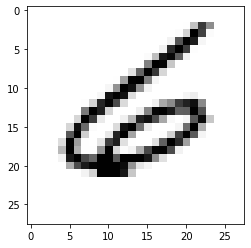

In [12]:
# Import package
import numpy as np
import matplotlib.pyplot as plt

# Assign filename to variable: file
file = 'data/mnist_kaggle_some_rows.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

## Customizing your NumPy import

Specify delimiter, rows to skip and columns to use:

(Data file not provided)

In [ ]:
# Import numpy
import numpy as np

# Assign the filename: file
# file = 'digits_header.txt'   DATA FILE NOT PROVIDED

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0,2])

# Print data
print(data)

## Importing different datatypes

These data consists of percentage of sea slug larvae that had metamorphosed in a given time period. Read more [here](http://www.stat.ucla.edu/~rgould/datasets/aboutseaslugs.html).

Due to the header, if you tried to import it as-is using `np.loadtxt()`, Python would throw you a `ValueError` and tell you that it `could not convert string` to float. There are two ways to deal with this: firstly, you can set the data type argument `dtype` equal to `str` (for string).

Alternatively, you can skip the first row as we have seen before, using the skiprows argument.

['Time' 'Percent']
[0.    0.357]


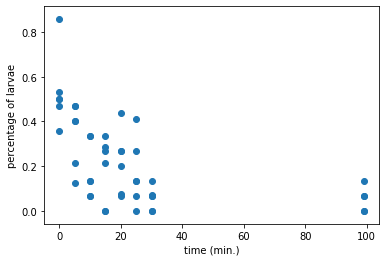

In [14]:
# Assign filename: file
file = 'data/seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

## Working with mixed datatypes (1)

Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function np.loadtxt() will freak at this. There is another function, `np.genfromtxt()`, which can handle such structures. If we pass `dtype=None` to it, it will figure out what types each column should be.

Import `'titanic.csv'` using the function `np.genfromtxt()` as follows:

`data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)`

Here, the first argument is the filename, the second specifies the delimiter `,` and the third argument `names` tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the [structured array](http://docs.scipy.org/doc/numpy/user/basics.rec.html) solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing `np.shape(data)`.

Accessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute `data[i]` and to get the column with name `'Fare'`, execute data['Fare'].

After importing the Titanic data as a structured array (as per the instructions above), print the entire column with the name `Survived` to the shell. What are the last 4 values of this column?

In [18]:
data = np.genfromtxt('data/titanic_sub.csv', delimiter=',', names=True, dtype=None)

data['Survived']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

## Working with mixed datatypes (2)

You have just used `np.genfromtxt()` to import data containing mixed datatypes. There is also another function `np.recfromcsv()` that behaves similarly to `np.genfromtxt()`, except that its default `dtype` is `None`. In this exercise, you'll practice using this to achieve the same result.

In [19]:
# Assign the filename: file
file = 'data/titanic_sub.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


## Using pandas to import flat files as DataFrames (1)

In the last exercise, you were able to import flat files containing columns with different datatypes as `numpy` arrays. However, the `DataFrame` object in pandas is a more appropriate structure in which to store such data and, thankfully, we can easily import files of mixed data types as DataFrames using the pandas functions `read_csv()` and `read_table()`.

In [22]:
# Import pandas as pd
import pandas as pd

# Assign the filename: file
file = 'data/titanic_sub.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Using pandas to import flat files as DataFrames (2)

In the last exercise, you were able to import flat files into a `pandas` DataFrame. As a bonus, it is then straightforward to retrieve the corresponding `numpy` array using the attribute `values`. You'll now have a chance to do this using the MNIST dataset, which is available as `digits.csv`.

In [23]:
# Assign the filename: file
file = 'data/mnist_kaggle_some_rows.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file,nrows=5,header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values

# Print the datatype of data_array to the shell
print(type(data_array))

<class 'numpy.ndarray'>


## Customizing your pandas import

The `pandas` package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also commonly referred to as `NA` or `NaN`. To wrap up this chapter, you're now going to import a slightly corrupted copy of the Titanic dataset `titanic_corrupt.txt`, which

* contains comments after the character '#'
* is tab-delimited.

In [ ]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
# file = 'titanic_corrupt.txt'  DATA FILE NOT PROVIDED

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()

# 2.  Importing data from other file types

# 3.  Working with relational databases in Python